In [15]:
%load_ext autoreload
%autoreload 2
import sys
# instead of creating a package using setup.py or building from a docker/singularity file,
# import the sister directory of src code to be called on in notebook.
# This keeps the notebook free from code to only hold visualizations and is easier to test
# It also helps keep the state of variables clean such that cells aren't run out of order with a mysterious state
sys.path.append("..")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from src import most_recent_mesonet_data
from src import most_recent_mesonet_time
from src import landtype_describe
from src.plotting_scripts import landtype
import os
import pandas as pd
import cartopy.crs as crs
import cartopy.feature as cfeature
import numpy as np

In [17]:
def format_df(df):
    colors = ['black', 'blue', 'white', 'coral', 'pink', 'red', 'magenta', 'gray', 'lime', 'forestgreen', 'green', 'olive', 'brown', 'slategray', 'darkorchid','plum', 'indigo', 'purple', 'yellow', 'gold', 'orange', 'cyan']
    legend = np.array([0,11,12,21,22,23,24,31,41,42,43,45,51,52,71,72,73,74,81,82,90,95])
    leg_str = ['No Data','Open Water','Perennial Ice/Snow',
    'Developed, Open Space','Developed, Low Intensity', 'Developed, Medium Intensity','Developed High Intensity',
    'Barren Land (Rock/Sand/Clay)',
    'Deciduous Forest','Evergreen Forest','Mixed Forest', 'Forest/Shrub',
    'Dwarf Scrub','Shrub/Scrub',
    'Grassland/Herbaceous','Sedge/Herbaceous','Lichens','Moss',
    'Pasture/Hay','Cultivated Crops',
    'Woody Wetlands','Emergent Herbaceous Wetlands']

    descripdict={}
    colordict={}

    for x,_ in enumerate(colors):
        descripdict.update({legend[x] : leg_str[x]})
        colordict.update({legend[x] : colors[x]})


    df['color'] = df['firstmode_val'].map(colordict)

    df['divide'] = (df['firstmode_count'] / df['sum_total']) * 100

def plurality_plot(df):
    colors = ['black', 'blue', 'white', 'coral', 'pink', 'red', 'magenta', 'gray', 'lime', 'forestgreen', 'green', 'olive', 'brown', 'slategray', 'darkorchid','plum', 'indigo', 'purple', 'yellow', 'gold', 'orange', 'cyan']
    legend = np.array([0,11,12,21,22,23,24,31,41,42,43,45,51,52,71,72,73,74,81,82,90,95])
    leg_str = ['No Data','Open Water','Perennial Ice/Snow',
    'Developed, Open Space','Developed, Low Intensity', 'Developed, Medium Intensity','Developed High Intensity',
    'Barren Land (Rock/Sand/Clay)',
    'Deciduous Forest','Evergreen Forest','Mixed Forest', 'Forest/Shrub',
    'Dwarf Scrub','Shrub/Scrub',
    'Grassland/Herbaceous','Sedge/Herbaceous','Lichens','Moss',
    'Pasture/Hay','Cultivated Crops',
    'Woody Wetlands','Emergent Herbaceous Wetlands']
    
              #legend 
    patches = []
    for i,_ in enumerate(colors):
            patch = mpatches.Patch(color=colors[i], label=leg_str[i])
            patches.append(patch)


    projPC = crs.PlateCarree()
    latN = df['lat'].max()+1
    latS = df['lat'].min()-1
    lonW = df['lon'].max()+1
    lonE = df['lon'].min()-1
    cLat = (latN + latS) / 2
    cLon = (lonW + lonE) / 2
    projLcc = crs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

    fig, ax = plt.subplots(figsize=(12,9), subplot_kw={'projection': crs.PlateCarree()})
    ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle='--');
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.STATES)
    ax.xticklabels_top = False
    ax.ylabels_right = False
    ax.gridlines(crs=crs.PlateCarree(), draw_labels=True,
                    linewidth=2, color='black', alpha=0.5, linestyle='--')
    ax.scatter(x=df['lon'],
                                        y=df['lat'],
                                        c=df['color'],
                                        s=df['divide'],
                                        marker = 'o',
                                        transform=crs.PlateCarree()
                                        )
    ax.set_title('Mesonet Site Plurality by Landtype', size=16)
    ax.set_xlabel('Longitude',size=14)
    ax.set_ylabel('Latitude',size=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.grid()
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,handles=patches)


def percent_plot(df):
    colors = ['black', 'blue', 'white', 'coral', 'pink', 'red', 'magenta', 'gray', 'lime', 'forestgreen', 'green', 'olive', 'brown', 'slategray', 'darkorchid','plum', 'indigo', 'purple', 'yellow', 'gold', 'orange', 'cyan']
    legend = np.array([0,11,12,21,22,23,24,31,41,42,43,45,51,52,71,72,73,74,81,82,90,95])
    leg_str = ['No Data','Open Water','Perennial Ice/Snow',
    'Developed, Open Space','Developed, Low Intensity', 'Developed, Medium Intensity','Developed High Intensity',
    'Barren Land (Rock/Sand/Clay)',
    'Deciduous Forest','Evergreen Forest','Mixed Forest', 'Forest/Shrub',
    'Dwarf Scrub','Shrub/Scrub',
    'Grassland/Herbaceous','Sedge/Herbaceous','Lichens','Moss',
    'Pasture/Hay','Cultivated Crops',
    'Woody Wetlands','Emergent Herbaceous Wetlands']

                #legend 
    patches = []
    for i,_ in enumerate(colors):
            patch = mpatches.Patch(color=colors[i], label=leg_str[i])
            patches.append(patch)
        
    fig, ax = plt.subplots(figsize=(20,10))
    ax.scatter(df['station'], df['divide'], c=df['color'], s=50)
    for n in df.iterrows():
        ax.annotate(n[1]['station'], (n[1]['station'], n[1]['divide']), fontsize=15)
    ax.grid()
    ax.set_ylabel('Percent of Total', size=20)
    ax.tick_params(labelbottom = False, bottom = False)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='center left', borderaxespad=0,handles=patches)


In [18]:
# This will return the most recent data avail on mesonet 
# this is my file path
ny_mesonet_data_path = '/home/aevans/nysm/archive/nysm/netcdf/proc'
ok_mesonet_data_path = '/home/aevans/landtype/geoinfo.csv'


In [19]:
# create a dataframe of mesonet data ny
ny_df = most_recent_mesonet_data.current_time_mesonet_df(ny_mesonet_data_path)
ny_df = most_recent_mesonet_time.most_recent_time(ny_df, ny_mesonet_data_path)
ny_df

,index,station,time_5M,lat,lon,elev,tair,ta9m,tslo,relh,...,ts05,ts25,ts50,sm05,sm25,sm50,frozen05,frozen25,frozen50,snow_depth
219,219,ADDI,2023-03-20 18:15:00,42.040359,-77.237259,507.614014,6.145450,5.845419,6.321291,24.254629,...,0.80,2.10,2.70,0.589,0.442,0.434,0.0,0.0,0.0,-0.005248
507,507,ANDE,2023-03-20 18:15:00,42.182270,-74.801392,518.281982,4.161555,4.026217,4.462123,25.315229,...,1.40,2.00,2.62,0.283,0.178,0.173,0.0,0.0,0.0,0.034052
795,795,BATA,2023-03-20 18:15:00,43.019939,-78.135658,276.119995,4.691193,4.176698,4.448887,31.971800,...,0.50,1.16,2.10,0.303,0.267,0.285,0.0,0.0,0.0,0.013882
1083,1083,BEAC,2023-03-20 18:15:00,41.528751,-73.945267,90.159798,9.163553,7.610053,8.802377,23.929979,...,5.20,3.60,3.90,0.402,0.427,0.403,0.0,0.0,0.0,0.004171
1371,1371,BELD,2023-03-20 18:15:00,42.223221,-75.668518,470.369995,5.530455,5.305304,5.972148,25.699829,...,1.10,1.40,2.00,0.448,0.477,0.407,0.0,0.0,0.0,0.027121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35067,35067,WFMB,2023-03-20 18:15:00,44.393234,-73.858826,614.598999,1.482347,1.133479,2.109374,47.079342,...,0.60,1.10,1.60,0.259,0.223,0.241,0.0,0.0,0.0,0.420171
35355,35355,WGAT,2023-03-20 18:15:00,43.532410,-75.158600,442.966003,2.714237,2.460433,3.292232,42.651981,...,0.20,0.50,1.00,0.163,0.276,0.102,0.0,0.0,0.0,0.390002
35643,35643,WHIT,2023-03-20 18:15:00,43.485073,-73.423073,36.563801,5.631289,5.622414,5.520102,34.393108,...,0.20,0.90,2.10,0.619,0.529,0.499,0.0,0.0,0.0,0.078145
35931,35931,WOLC,2023-03-20 18:15:00,43.228680,-76.842613,121.219002,6.606565,5.859710,6.728851,38.554649,...,0.20,0.60,1.00,0.284,0.041,0.117,0.0,0.0,0.0,0.010220


In [20]:
ny_df_lons = ny_df['lon'].to_list()
ny_df_lats = ny_df['lat'].to_list()

In [21]:
# create a dataframe of mesonet data ok
ok_df = pd.read_csv(ok_mesonet_data_path)
ok_df

,stnm,stid,name,city,rang,cdir,cnty,nlat,elon,elev,...,A75,N75,BULK75,GRAV75,SAND75,SILT75,CLAY75,TEXT75,datc,datd
0,110,ACME,Acme,Rush Springs,4.0,WNW,Grady,34.80833,-98.02325,397,...,0.178,1.32,1.68,0.0,53.2,24.1,22.8,Sandy Clay Loam,19940101,20991231
1,1,ADAX,Ada,Ada,2.0,NNE,Pontotoc,34.79851,-96.66909,295,...,0.053,1.20,1.86,0.0,43.6,26.6,29.8,Clay Loam,19940101,20991231
2,2,ALTU,Altus,Altus,3.0,S,Jackson,34.58722,-99.33808,416,...,0.059,1.16,1.73,0.0,15.0,40.9,44.1,Silty Clay,19940101,20991231
3,116,ALV2,Alva,Alva,7.2,SSW,Woods,36.70823,-98.70974,439,...,-999.000,-999.00,-999.00,-999.0,-999.0,-999.0,-999.0,-999,19981217,20991231
4,3,ALVA,Alva,Alva,2.0,S,Woods,36.77970,-98.67170,450,...,-999.000,-999.00,-999.00,-999.0,-999.0,-999.0,-999.0,-999,19940101,19981216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,105,WILB,Wilburton,Wilburton,2.0,SW,Latimer,34.90092,-95.34805,199,...,0.189,1.21,1.37,0.0,8.7,27.4,63.9,Clay,19940101,20991231
140,106,WIST,Wister,Wister,3.0,ENE,LeFlore,34.98426,-94.68778,143,...,0.096,1.16,1.44,0.0,4.4,24.9,70.8,Clay,19940101,20991231
141,107,WOOD,Woodward,Woodward,2.0,WSW,Woodward,36.42329,-99.41682,625,...,0.270,1.47,1.33,0.0,42.6,31.9,25.5,Loam,19940101,20991231
142,108,WYNO,Wynona,Wynona,2.0,S,Osage,36.51806,-96.34222,269,...,0.079,1.23,1.69,0.0,9.8,37.2,53.0,Clay,19940101,20991231


In [22]:
ok_df_lons = ok_df['elon'].to_list()
ok_df_lats = ok_df['nlat'].to_list()

develop way to add modes

In [23]:
csv_path = '/home/aevans/landtype/data/buffer_10_km/'

In [24]:
# these are my csvs for the landtype buffers in the nysm 
all_files = os.listdir(csv_path)    
csv_files = list(filter(lambda f: f.endswith('.csv'), all_files))
csv_files

['avg_lulc_ny_10.csv', 'avg_lulc_ok_10.csv']

In [25]:
station_list_ny = ny_df['station'].to_list()
station_list_ny

['ADDI',
 'ANDE',
 'BATA',
 'BEAC',
 'BELD',
 'BELL',
 'BELM',
 'BERK',
 'BING',
 'BKLN',
 'BRAN',
 'BREW',
 'BROC',
 'BRON',
 'BROO',
 'BSPA',
 'BUFF',
 'BURD',
 'BURT',
 'CAMD',
 'CAPE',
 'CHAZ',
 'CHES',
 'CINC',
 'CLAR',
 'CLIF',
 'CLYM',
 'COBL',
 'COHO',
 'COLD',
 'COPA',
 'COPE',
 'CROG',
 'CSQR',
 'DELE',
 'DEPO',
 'DOVE',
 'DUAN',
 'EAUR',
 'EDIN',
 'EDWA',
 'ELDR',
 'ELLE',
 'ELMI',
 'ESSX',
 'FAYE',
 'FRED',
 'GABR',
 'GFAL',
 'GFLD',
 'GROT',
 'GROV',
 'HAMM',
 'HARP',
 'HARR',
 'HART',
 'HERK',
 'HFAL',
 'ILAK',
 'JOHN',
 'JORD',
 'KIND',
 'LAUR',
 'LOUI',
 'MALO',
 'MANH',
 'MEDI',
 'MEDU',
 'MORR',
 'NBRA',
 'NEWC',
 'NHUD',
 'OLDF',
 'OLEA',
 'ONTA',
 'OPPE',
 'OSCE',
 'OSWE',
 'OTIS',
 'OWEG',
 'PENN',
 'PHIL',
 'PISE',
 'POTS',
 'QUEE',
 'RAND',
 'RAQU',
 'REDF',
 'REDH',
 'ROXB',
 'RUSH',
 'SARA',
 'SBRI',
 'SCHA',
 'SCHO',
 'SCHU',
 'SCIP',
 'SHER',
 'SOME',
 'SOUT',
 'SPRA',
 'SPRI',
 'STAT',
 'STEP',
 'STON',
 'SUFF',
 'TANN',
 'TICO',
 'TULL',
 'TUPP',
 'TYRO',
 

In [26]:
nysm_coords = pd.DataFrame()
nysm_coords['station'] = station_list_ny
nysm_coords['latitude'] = ny_df_lats
nysm_coords['longitude'] = ny_df_lons
nysm_coords

,station,latitude,longitude
0,ADDI,42.040359,-77.237259
1,ANDE,42.182270,-74.801392
2,BATA,43.019939,-78.135658
3,BEAC,41.528751,-73.945267
4,BELD,42.223221,-75.668518
...,...,...,...
121,WFMB,44.393234,-73.858826
122,WGAT,43.532410,-75.158600
123,WHIT,43.485073,-73.423073
124,WOLC,43.228680,-76.842613


In [27]:
#nysm_coords.to_csv('/home/aevans/landtype/notebooks/nysm_coords.csv')

In [28]:
# first mode
count1_list = [102510]
class_name1_list = ['Deciduous Forest']
value1_list = [41]

# second mode
count2_list = [89978]
class_name2_list = ['Mixed Forest']
value2_list = [43]

#third mode
count3_list = [89646]
class_name3_list = ['Pasture/Hay']
value3_list = [81]

# sums 
#sums
sums_list = [349019]

In [29]:
colors = ['black', 'blue', 'white', 'coral', 'pink', 'red', 'magenta', 'gray', 'lime', 'forestgreen', 'green', 'olive', 'brown', 'slategray', 'darkorchid','plum', 'indigo', 'purple', 'yellow', 'gold', 'orange', 'cyan']
legend = np.array([0,11,12,21,22,23,24,31,41,42,43,45,51,52,71,72,73,74,81,82,90,95])
leg_str = ['No Data','Open Water','Perennial Ice/Snow',
'Developed, Open Space','Developed, Low Intensity', 'Developed, Medium Intensity','Developed High Intensity',
'Barren Land (Rock/Sand/Clay)',
'Deciduous Forest','Evergreen Forest','Mixed Forest', 'Forest/Shrub',
'Dwarf Scrub','Shrub/Scrub',
'Grassland/Herbaceous','Sedge/Herbaceous','Lichens','Moss',
'Pasture/Hay','Cultivated Crops',
'Woody Wetlands','Emergent Herbaceous Wetlands']

In [30]:
len(legend)

22

In [31]:
csv_path_x = '/home/aevans/landtype/data/buffer_10_km/extract_csv_nysm/'
# these are my csvs for the landtype buffers in the nysm 
all_files_x = os.listdir(csv_path_x)   
csv_files_x = list(filter(lambda f: f.endswith('.csv'), all_files_x))
csv_files_x

['69_csv.csv',
 '89_csv.csv',
 '59_csv.csv',
 '118_csv.csv',
 '47_csv.csv',
 '119_csv.csv',
 '11_csv.csv',
 '60_csv.csv',
 '122_csv.csv',
 '112_csv.csv',
 '49_csv.csv',
 '64_csv.csv',
 '74_csv.csv',
 '32_csv.csv',
 '8_csv.csv',
 '88_csv.csv',
 '77_csv.csv',
 '97_csv.csv',
 '17_csv.csv',
 '51_csv.csv',
 '46_csv.csv',
 '75_csv.csv',
 '6_csv.csv',
 '80_csv.csv',
 '40_csv.csv',
 '12_csv.csv',
 '99_csv.csv',
 '58_csv.csv',
 '45_csv.csv',
 '2_csv.csv',
 '7_csv.csv',
 '19_csv.csv',
 '121_csv.csv',
 '83_csv.csv',
 '76_csv.csv',
 '38_csv.csv',
 '81_csv.csv',
 '27_csv.csv',
 '42_csv.csv',
 '96_csv.csv',
 '123_csv.csv',
 '30_csv.csv',
 '94_csv.csv',
 '78_csv.csv',
 '126_csv.csv',
 '50_csv.csv',
 '24_csv.csv',
 '43_csv.csv',
 '21_csv.csv',
 '98_csv.csv',
 '15_csv.csv',
 '86_csv.csv',
 '41_csv.csv',
 '82_csv.csv',
 '79_csv.csv',
 '73_csv.csv',
 '31_csv.csv',
 '13_csv.csv',
 '18_csv.csv',
 '84_csv.csv',
 '29_csv.csv',
 '63_csv.csv',
 '48_csv.csv',
 '44_csv.csv',
 '125_csv.csv',
 '124_csv.csv',
 '37_

In [32]:
df_complete = pd.DataFrame()
for i in range(1,127):
    df_x = pd.read_csv(f'/home/aevans/landtype/data/buffer_10_km/extract_csv_nysm/{i}_csv.csv')
    df_x = df_x.assign(Percentage = lambda x: (x['Count'] / sum(df_x['Count']) * 100))
    df_x['site'] = i
    df_x = df_x.pivot(index='site',columns='Value',values='Percentage')
    df_complete = pd.concat([df_complete, df_x])


In [33]:
df_complete = df_complete.fillna(0)
df_complete['station'] = station_list_ny


In [34]:
#df_complete.to_csv('/home/aevans/landtype/data/buffer_10_percent.csv')

In [35]:
for i in range(2,127):
    df = pd.read_csv(f'/home/aevans/landtype/data/buffer_10_km/extract_csv_nysm/{i}_csv.csv')
    the_mode = df.sort_values(by=['Count'], ascending=False) 
    #first mode
    first_mode = the_mode.iloc[0]
    count1 = first_mode['Count'].tolist()
    class_name1 = first_mode['ClassName']
    value1 = first_mode['Value'].tolist()
    count1_list.append(count1)
    class_name1_list.append(class_name1)
    value1_list.append(value1)
    #second mode
    second_mode = the_mode.iloc[1]
    count2 = second_mode['Count'].tolist()
    class_name2 = second_mode['ClassName']
    value2 = second_mode['Value'].tolist()
    count2_list.append(count2)
    class_name2_list.append(class_name2)
    value2_list.append(value2)
    #third mode
    third_mode = the_mode.iloc[2]
    count3 = third_mode['Count'].tolist()
    class_name3 = third_mode['ClassName']
    value3 = third_mode['Value'].tolist()
    count3_list.append(count3)
    class_name3_list.append(class_name3)
    value3_list.append(value3)
    #sum
    sums = sum(the_mode['Count'])
    sums_list.append(sums)

In [36]:
avg_lulc_ny_10_df = pd.DataFrame()
avg_lulc_ny_10_df['station'] = station_list_ny
#first mode
avg_lulc_ny_10_df['firstmode_count'] = count1_list
avg_lulc_ny_10_df['firstmode_class'] = class_name1_list
avg_lulc_ny_10_df['firstmode_val'] = value1_list
# second mode
avg_lulc_ny_10_df['secondmode_count'] = count2_list
avg_lulc_ny_10_df['secondmode_class'] = class_name2_list
avg_lulc_ny_10_df['secondmode_val'] = value2_list
#third mode
avg_lulc_ny_10_df['thirdmode_count'] = count3_list
avg_lulc_ny_10_df['thirdmode_class'] = class_name3_list
avg_lulc_ny_10_df['thirdmode_val'] = value3_list
avg_lulc_ny_10_df['sum_total'] = sums_list
#avg_lulc_ny_10_df.to_csv('/home/aevans/landtype/data/buffer_10_km/avg_lulc_ny_10.csv')

# Oklahoma

In [37]:
csv_path = '/home/aevans/landtype/data/buffer_10_km/extract_csv_oksm/'

In [38]:
# these are my csvs for the landtype buffers in the nysm 
all_files = os.listdir(csv_path)    
csv_files = list(filter(lambda f: f.endswith('.csv'), all_files))
csv_files

['69_csv.csv',
 '89_csv.csv',
 '59_csv.csv',
 '118_csv.csv',
 '47_csv.csv',
 '138_csv.csv',
 '119_csv.csv',
 '11_csv.csv',
 '60_csv.csv',
 '122_csv.csv',
 '112_csv.csv',
 '49_csv.csv',
 '64_csv.csv',
 '137_csv.csv',
 '74_csv.csv',
 '135_csv.csv',
 '32_csv.csv',
 '8_csv.csv',
 '88_csv.csv',
 '77_csv.csv',
 '97_csv.csv',
 '17_csv.csv',
 '51_csv.csv',
 '46_csv.csv',
 '75_csv.csv',
 '6_csv.csv',
 '80_csv.csv',
 '40_csv.csv',
 '12_csv.csv',
 '99_csv.csv',
 '58_csv.csv',
 '45_csv.csv',
 '2_csv.csv',
 '7_csv.csv',
 '19_csv.csv',
 '121_csv.csv',
 '83_csv.csv',
 '76_csv.csv',
 '38_csv.csv',
 '81_csv.csv',
 '27_csv.csv',
 '42_csv.csv',
 '96_csv.csv',
 '123_csv.csv',
 '30_csv.csv',
 '94_csv.csv',
 '78_csv.csv',
 '126_csv.csv',
 '50_csv.csv',
 '24_csv.csv',
 '139_csv.csv',
 '144_csv.csv',
 '130_csv.csv',
 '43_csv.csv',
 '21_csv.csv',
 '98_csv.csv',
 '15_csv.csv',
 '86_csv.csv',
 '41_csv.csv',
 '82_csv.csv',
 '79_csv.csv',
 '73_csv.csv',
 '31_csv.csv',
 '13_csv.csv',
 '18_csv.csv',
 '140_csv.csv',


In [39]:
station_list_ok = ok_df['stid'].to_list()
len(station_list_ok)

144

In [40]:
oksm_coords = pd.DataFrame()
oksm_coords['station'] = station_list_ok
oksm_coords['latitude'] = ok_df_lats
oksm_coords['longitude'] = ok_df_lons
oksm_coords

,station,latitude,longitude
0,ACME,34.80833,-98.02325
1,ADAX,34.79851,-96.66909
2,ALTU,34.58722,-99.33808
3,ALV2,36.70823,-98.70974
4,ALVA,36.77970,-98.67170
...,...,...,...
139,WILB,34.90092,-95.34805
140,WIST,34.98426,-94.68778
141,WOOD,36.42329,-99.41682
142,WYNO,36.51806,-96.34222


In [ ]:
oksm_coords.to_csv('/home/aevans/landtype/notebooks/oksm_coords.csv')

In [24]:
# first mode
count1_list_ok = [244513]
class_name1_list_ok = ['Grassland/Herbaceous']
value1_list_ok = [71]

# second mode
count2_list_ok = [58444]
class_name2_list_ok = ['Deciduous Forest']
value2_list_ok = [41]

#third mode
count3_list_ok = [20559]
class_name3_list_ok = ['Cultivated Crops']
value3_list_ok = [82]

#sums
sums_list_ok = [349024]

In [26]:
df_complete_ok = pd.DataFrame()
for i in range(1,145):
    df_y = pd.read_csv(f'/home/aevans/landtype/data/buffer_10_km/extract_csv_oksm/{i}_csv.csv')
    df_y = df_y.assign(Percentage = lambda x: (x['Count'] / sum(df_y['Count']) * 100))
    df_y['site'] = i
    df_y = df_y.pivot(index='site',columns='Value',values='Percentage')
    df_complete_ok = pd.concat([df_complete_ok, df_y])

In [27]:
df_complete_ok = df_complete_ok.fillna(0)
df_complete_ok['station'] = station_list_ok

In [28]:
#df_complete_ok.to_csv('/home/aevans/landtype/data/OKbuffer_10_percent.csv')

In [29]:
for i in range(2,145):
    df = pd.read_csv(f'/home/aevans/landtype/data/buffer_10_km/extract_csv_oksm/{i}_csv.csv')
    the_mode = df.sort_values(by=['Count'], ascending=False) 
    #first mode
    first_mode = the_mode.iloc[0]
    count1 = first_mode['Count'].tolist()
    class_name1 = first_mode['ClassName']
    value1 = first_mode['Value'].tolist()
    count1_list_ok.append(count1)
    class_name1_list_ok.append(class_name1)
    value1_list_ok.append(value1)
    #second mode
    second_mode = the_mode.iloc[1]
    count2 = second_mode['Count'].tolist()
    class_name2 = second_mode['ClassName']
    value2 = second_mode['Value'].tolist()
    count2_list_ok.append(count2)
    class_name2_list_ok.append(class_name2)
    value2_list_ok.append(value2)
    #third mode
    third_mode = the_mode.iloc[2]
    count3 = third_mode['Count'].tolist()
    class_name3 = third_mode['ClassName']
    value3 = third_mode['Value'].tolist()
    count3_list_ok.append(count3)
    class_name3_list_ok.append(class_name3)
    value3_list_ok.append(value3)
     #sum
    sums = sum(the_mode['Count'])
    sums_list_ok.append(sums)

In [30]:
avg_lulc_ok_10_df = pd.DataFrame()
avg_lulc_ok_10_df['station'] = station_list_ok
#first mode
avg_lulc_ok_10_df['firstmode_count'] = count1_list_ok
avg_lulc_ok_10_df['firstmode_class'] = class_name1_list_ok
avg_lulc_ok_10_df['firstmode_val'] = value1_list_ok
# second mode
avg_lulc_ok_10_df['secondmode_count'] = count2_list_ok
avg_lulc_ok_10_df['secondmode_class'] = class_name2_list_ok
avg_lulc_ok_10_df['secondmode_val'] = value2_list_ok
#third mode
avg_lulc_ok_10_df['thirdmode_count'] = count3_list_ok
avg_lulc_ok_10_df['thirdmode_class'] = class_name3_list_ok
avg_lulc_ok_10_df['thirdmode_val'] = value3_list_ok
avg_lulc_ok_10_df['sum_total'] = sums_list_ok
#avg_lulc_ok_10_df.to_csv('/home/aevans/landtype/data/buffer_10_km/avg_lulc_ok_10.csv')

In [31]:
avg_lulc_ny_10_df = pd.read_csv('/home/aevans/landtype/data/buffer_10_km/avg_lulc_ny_10.csv')
avg_lulc_ok_10_df = pd.read_csv('/home/aevans/landtype/data/buffer_10_km/avg_lulc_ok_10.csv')

In [32]:
import matplotlib.pyplot as plt 
import pandas as pd
import cartopy.crs as crs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib import colors

LEG_STR = ['No Data','Open Water','Perennial Ice/Snow',
    'Developed, Open Space','Developed, Low Intensity', 'Developed, Medium Intensity','Developed High Intensity',
    'Barren Land (Rock/Sand/Clay)',
    'Deciduous Forest','Evergreen Forest','Mixed Forest', 'Forest/Shrub',
    'Dwarf Scrub','Shrub/Scrub',
    'Grassland/Herbaceous','Sedge/Herbaceous','Lichens','Moss',
    'Pasture/Hay','Cultivated Crops',
    'Woody Wetlands','Emergent Herbaceous Wetlands']
COLORS = ['black', 'blue', 'white', 'coral', 'pink', 'red', 'magenta', 'gray', 'lime', 'forestgreen', 'green', 'olive', 'brown', 'slategray', 'darkorchid','plum', 'indigo', 'purple', 'yellow', 'gold', 'orange', 'cyan']


def create_cmap()->ListedColormap:
    """
    this creates the landtype colormap

    Returns:
        cmap (ListedColorMap)
    """

    legend = np.array([0,11,12,21,22,23,24,31,41,42,43,45,51,52,71,72,73,74,81,82,90,95])


    colordict={}
    for x,_ in enumerate(COLORS):
        colordict.update({legend[x] : COLORS[x]})
    return ListedColormap(colordict)


def landtype(df:pd.DataFrame)->None: 
    """
    this plots the landtype for a specified region determined by the imported dataframe

    Args: 
        df (pd.DataFrame): landtype, lat, lon
    """
    cmap = create_cmap()

    projPC = crs.PlateCarree()
    latN = df['lat'].max()
    latS = df['lat'].min()
    lonW = df['lon'].max()
    lonE = df['lon'].min()
    cLat = (latN + latS) / 2
    cLon = (lonW + lonE) / 2
    projLcc = crs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

    fig, ax = plt.subplots(figsize=(12,9), subplot_kw={'projection': crs.PlateCarree()})
    ax.legend()
    ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle='--');
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.STATES)
    ax.xticklabels_top = False
    ax.ylabels_right = False
    ax.gridlines(crs=crs.PlateCarree(), draw_labels=True,
                    linewidth=2, color='black', alpha=0.5, linestyle='--')

    plt.scatter(df['lon'], df['lat'], c=df['color'], cmap = cmap, transform=crs.PlateCarree(), zorder=5)

    #legend 
    patches = []
    for i,_ in enumerate(COLORS):
            patch = mpatches.Patch(color=COLORS[i], label=LEG_STR[i])
            patches.append(patch)
            


    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,handles=patches)

In [33]:
colors = ['black', 'blue', 'white', 'coral', 'pink', 'red', 'magenta', 'gray', 'lime', 'forestgreen', 'green', 'olive', 'brown', 'slategray', 'darkorchid','plum', 'indigo', 'purple', 'yellow', 'gold', 'orange', 'cyan']
legend = np.array([0,11,12,21,22,23,24,31,41,42,43,45,51,52,71,72,73,74,81,82,90,95])
leg_str = ['No Data','Open Water','Perennial Ice/Snow',
'Developed, Open Space','Developed, Low Intensity', 'Developed, Medium Intensity','Developed High Intensity',
'Barren Land (Rock/Sand/Clay)',
'Deciduous Forest','Evergreen Forest','Mixed Forest', 'Forest/Shrub',
'Dwarf Scrub','Shrub/Scrub',
'Grassland/Herbaceous','Sedge/Herbaceous','Lichens','Moss',
'Pasture/Hay','Cultivated Crops',
'Woody Wetlands','Emergent Herbaceous Wetlands']

descripdict={}
colordict={}

for x,_ in enumerate(colors):
    descripdict.update({legend[x] : leg_str[x]})
    colordict.update({legend[x] : colors[x]})


avg_lulc_ny_10_df['color'] = avg_lulc_ny_10_df['firstmode_val'].map(colordict)
avg_lulc_ny_10_df['lon'] = ny_df_lons
avg_lulc_ny_10_df['lat'] = ny_df_lats

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


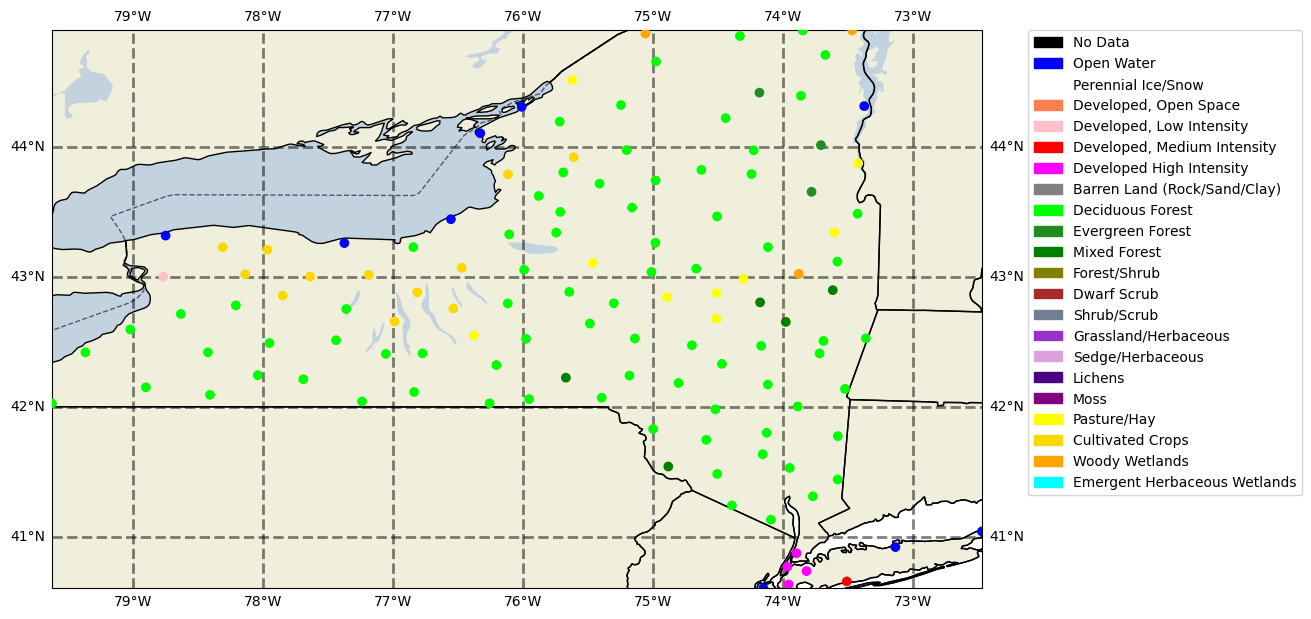

In [34]:
landtype(avg_lulc_ny_10_df)

In [35]:
colors = ['black', 'blue', 'white', 'coral', 'pink', 'red', 'magenta', 'gray', 'lime', 'forestgreen', 'green', 'olive', 'brown', 'slategray', 'darkorchid','plum', 'indigo', 'purple', 'yellow', 'gold', 'orange', 'cyan']
legend = np.array([0,11,12,21,22,23,24,31,41,42,43,45,51,52,71,72,73,74,81,82,90,95])
leg_str = ['No Data','Open Water','Perennial Ice/Snow',
'Developed, Open Space','Developed, Low Intensity', 'Developed, Medium Intensity','Developed High Intensity',
'Barren Land (Rock/Sand/Clay)',
'Deciduous Forest','Evergreen Forest','Mixed Forest', 'Forest/Shrub',
'Dwarf Scrub','Shrub/Scrub',
'Grassland/Herbaceous','Sedge/Herbaceous','Lichens','Moss',
'Pasture/Hay','Cultivated Crops',
'Woody Wetlands','Emergent Herbaceous Wetlands']

descripdict={}
colordict={}

for x,_ in enumerate(colors):
    descripdict.update({legend[x] : leg_str[x]})
    colordict.update({legend[x] : colors[x]})


avg_lulc_ok_10_df['color'] = avg_lulc_ok_10_df['firstmode_val'].map(colordict)
avg_lulc_ok_10_df['lon'] = ok_df_lons
avg_lulc_ok_10_df['lat'] = ok_df_lats

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


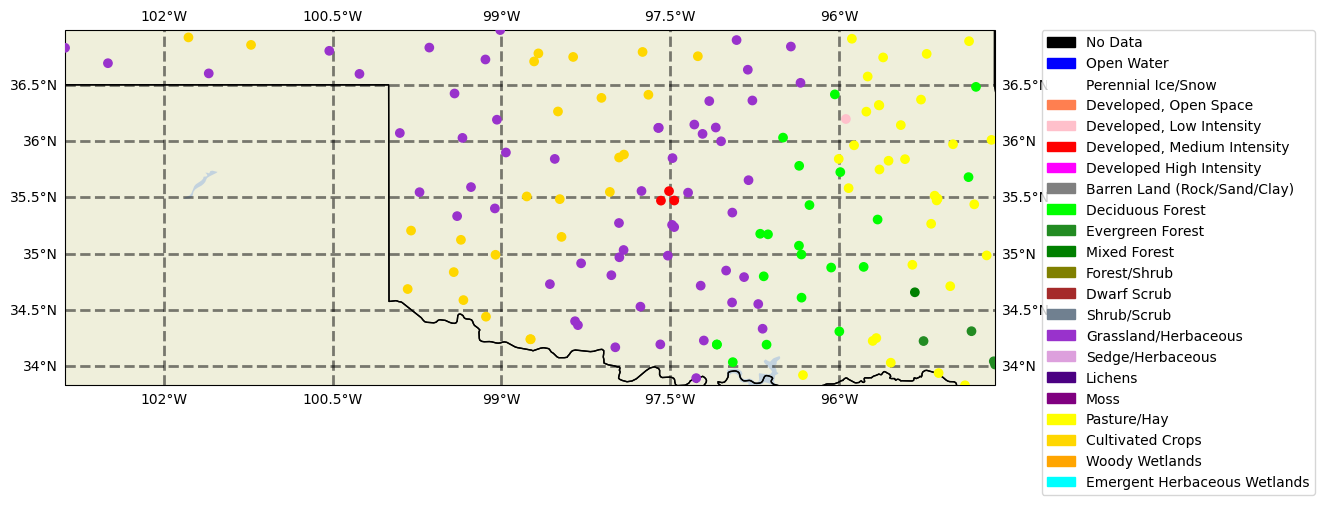

In [36]:
landtype(avg_lulc_ok_10_df)

In [37]:
avg_lulc_ny_10_df

,Unnamed: 0,station,firstmode_count,firstmode_class,firstmode_val,secondmode_count,secondmode_class,secondmode_val,thirdmode_count,thirdmode_class,thirdmode_val,sum_total,color,lon,lat
0,0,ADDI,102510.0,Deciduous Forest,41,89978.0,Mixed Forest,43,89646.0,Pasture/Hay,81,349019.0,lime,-77.237259,42.040359
1,1,ANDE,231578.0,Deciduous Forest,41,38639.0,Mixed Forest,43,38113.0,Pasture/Hay,81,349027.0,lime,-74.801392,42.182270
2,2,BATA,188167.0,Cultivated Crops,82,43152.0,Woody Wetlands,90,32775.0,Pasture/Hay,81,349032.0,gold,-78.135658,43.019939
3,3,BEAC,149074.0,Deciduous Forest,41,38782.0,Developed Open Space,21,37181.0,Open Water,11,349015.0,lime,-73.945267,41.528751
4,4,BELD,111398.0,Mixed Forest,43,99057.0,Deciduous Forest,41,77808.0,Pasture/Hay,81,349010.0,green,-75.668518,42.223221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,121,WFMB,135606.0,Deciduous Forest,41,120244.0,Evergreen Forest,42,52521.0,Mixed Forest,43,349003.0,lime,-73.858826,44.393234
122,122,WGAT,180873.0,Deciduous Forest,41,60672.0,Evergreen Forest,42,58405.0,Woody Wetlands,90,349029.0,lime,-75.158600,43.532410
123,123,WHIT,107507.0,Deciduous Forest,41,84855.0,Evergreen Forest,42,64891.0,Pasture/Hay,81,349020.0,lime,-73.423073,43.485073
124,124,WOLC,110212.0,Deciduous Forest,41,87370.0,Cultivated Crops,82,38749.0,Woody Wetlands,90,349016.0,lime,-76.842613,43.228680


In [38]:
avg_lulc_ny_10_df['firstmode_class'].value_counts()

Deciduous Forest              79
Cultivated Crops              12
Open Water                     9
Pasture/Hay                    9
Mixed Forest                   5
Developed High Intensity       4
Woody Wetlands                 3
Evergreen Forest               3
Developed Low Intensity        1
Developed Medium Intensity     1
Name: firstmode_class, dtype: int64

In [39]:
avg_lulc_ok_10_df['firstmode_class'].value_counts()


Grassland/Herbaceous          57
Pasture/Hay                   32
Cultivated Crops              25
Deciduous Forest              21
Evergreen Forest               4
Developed Medium Intensity     3
Mixed Forest                   1
Developed Low Intensity        1
Name: firstmode_class, dtype: int64

In [40]:
def format_df(df):
    colors = ['black', 'blue', 'white', 'coral', 'pink', 'red', 'magenta', 'gray', 'lime', 'forestgreen', 'green', 'olive', 'brown', 'slategray', 'darkorchid','plum', 'indigo', 'purple', 'yellow', 'gold', 'orange', 'cyan']
    legend = np.array([0,11,12,21,22,23,24,31,41,42,43,45,51,52,71,72,73,74,81,82,90,95])
    leg_str = ['No Data','Open Water','Perennial Ice/Snow',
    'Developed, Open Space','Developed, Low Intensity', 'Developed, Medium Intensity','Developed High Intensity',
    'Barren Land (Rock/Sand/Clay)',
    'Deciduous Forest','Evergreen Forest','Mixed Forest', 'Forest/Shrub',
    'Dwarf Scrub','Shrub/Scrub',
    'Grassland/Herbaceous','Sedge/Herbaceous','Lichens','Moss',
    'Pasture/Hay','Cultivated Crops',
    'Woody Wetlands','Emergent Herbaceous Wetlands']

    descripdict={}
    colordict={}

    for x,_ in enumerate(colors):
        descripdict.update({legend[x] : leg_str[x]})
        colordict.update({legend[x] : colors[x]})


    df['color'] = df['firstmode_val'].map(colordict)

    total = df['firstmode_count'] + df['secondmode_count'] + df['thirdmode_count']
    df['divide'] = (df['firstmode_count'] / total) * 100

In [41]:
colors = ['black', 'blue', 'white', 'coral', 'pink', 'red', 'magenta', 'gray', 'lime', 'forestgreen', 'green', 'olive', 'brown', 'slategray', 'darkorchid','plum', 'indigo', 'purple', 'yellow', 'gold', 'orange', 'cyan']
legend = np.array([0,11,12,21,22,23,24,31,41,42,43,45,51,52,71,72,73,74,81,82,90,95])
leg_str = ['No Data','Open Water','Perennial Ice/Snow',
'Developed, Open Space','Developed, Low Intensity', 'Developed, Medium Intensity','Developed High Intensity',
'Barren Land (Rock/Sand/Clay)',
'Deciduous Forest','Evergreen Forest','Mixed Forest', 'Forest/Shrub',
'Dwarf Scrub','Shrub/Scrub',
'Grassland/Herbaceous','Sedge/Herbaceous','Lichens','Moss',
'Pasture/Hay','Cultivated Crops',
'Woody Wetlands','Emergent Herbaceous Wetlands']

descripdict={}
colordict={}

for x,_ in enumerate(colors):
    descripdict.update({legend[x] : leg_str[x]})
    colordict.update({legend[x] : colors[x]})


avg_lulc_ny_10_df['color'] = avg_lulc_ny_10_df['firstmode_val'].map(colordict)

In [42]:
total = avg_lulc_ny_10_df['firstmode_count'] + avg_lulc_ny_10_df['secondmode_count'] + avg_lulc_ny_10_df['thirdmode_count']

In [43]:
avg_lulc_ny_10_df['divide'] = (avg_lulc_ny_10_df['firstmode_count'] / total) * 100

In [44]:
marklist = []
for x,_ in avg_lulc_ny_10_df.iterrows():
    if avg_lulc_ny_10_df['divide'].iloc[x] < 50:
        mark = 'o'
    else: 
        mark = '^'
    marklist.append(mark)

In [45]:
avg_lulc_ny_10_df['mark'] = marklist
avg_lulc_ny_10_df

,Unnamed: 0,station,firstmode_count,firstmode_class,firstmode_val,secondmode_count,secondmode_class,secondmode_val,thirdmode_count,thirdmode_class,thirdmode_val,sum_total,color,lon,lat,divide,mark
0,0,ADDI,102510.0,Deciduous Forest,41,89978.0,Mixed Forest,43,89646.0,Pasture/Hay,81,349019.0,lime,-77.237259,42.040359,36.333799,o
1,1,ANDE,231578.0,Deciduous Forest,41,38639.0,Mixed Forest,43,38113.0,Pasture/Hay,81,349027.0,lime,-74.801392,42.182270,75.107190,^
2,2,BATA,188167.0,Cultivated Crops,82,43152.0,Woody Wetlands,90,32775.0,Pasture/Hay,81,349032.0,gold,-78.135658,43.019939,71.250009,^
3,3,BEAC,149074.0,Deciduous Forest,41,38782.0,Developed Open Space,21,37181.0,Open Water,11,349015.0,lime,-73.945267,41.528751,66.244218,^
4,4,BELD,111398.0,Mixed Forest,43,99057.0,Deciduous Forest,41,77808.0,Pasture/Hay,81,349010.0,green,-75.668518,42.223221,38.644571,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,121,WFMB,135606.0,Deciduous Forest,41,120244.0,Evergreen Forest,42,52521.0,Mixed Forest,43,349003.0,lime,-73.858826,44.393234,43.974952,o
122,122,WGAT,180873.0,Deciduous Forest,41,60672.0,Evergreen Forest,42,58405.0,Woody Wetlands,90,349029.0,lime,-75.158600,43.532410,60.301050,^
123,123,WHIT,107507.0,Deciduous Forest,41,84855.0,Evergreen Forest,42,64891.0,Pasture/Hay,81,349020.0,lime,-73.423073,43.485073,41.790378,o
124,124,WOLC,110212.0,Deciduous Forest,41,87370.0,Cultivated Crops,82,38749.0,Woody Wetlands,90,349016.0,lime,-76.842613,43.228680,46.634593,o


In [46]:
    #legend 
    patches = []
    for i,_ in enumerate(colors):
            patch = mpatches.Patch(color=colors[i], label=leg_str[i])
            patches.append(patch)

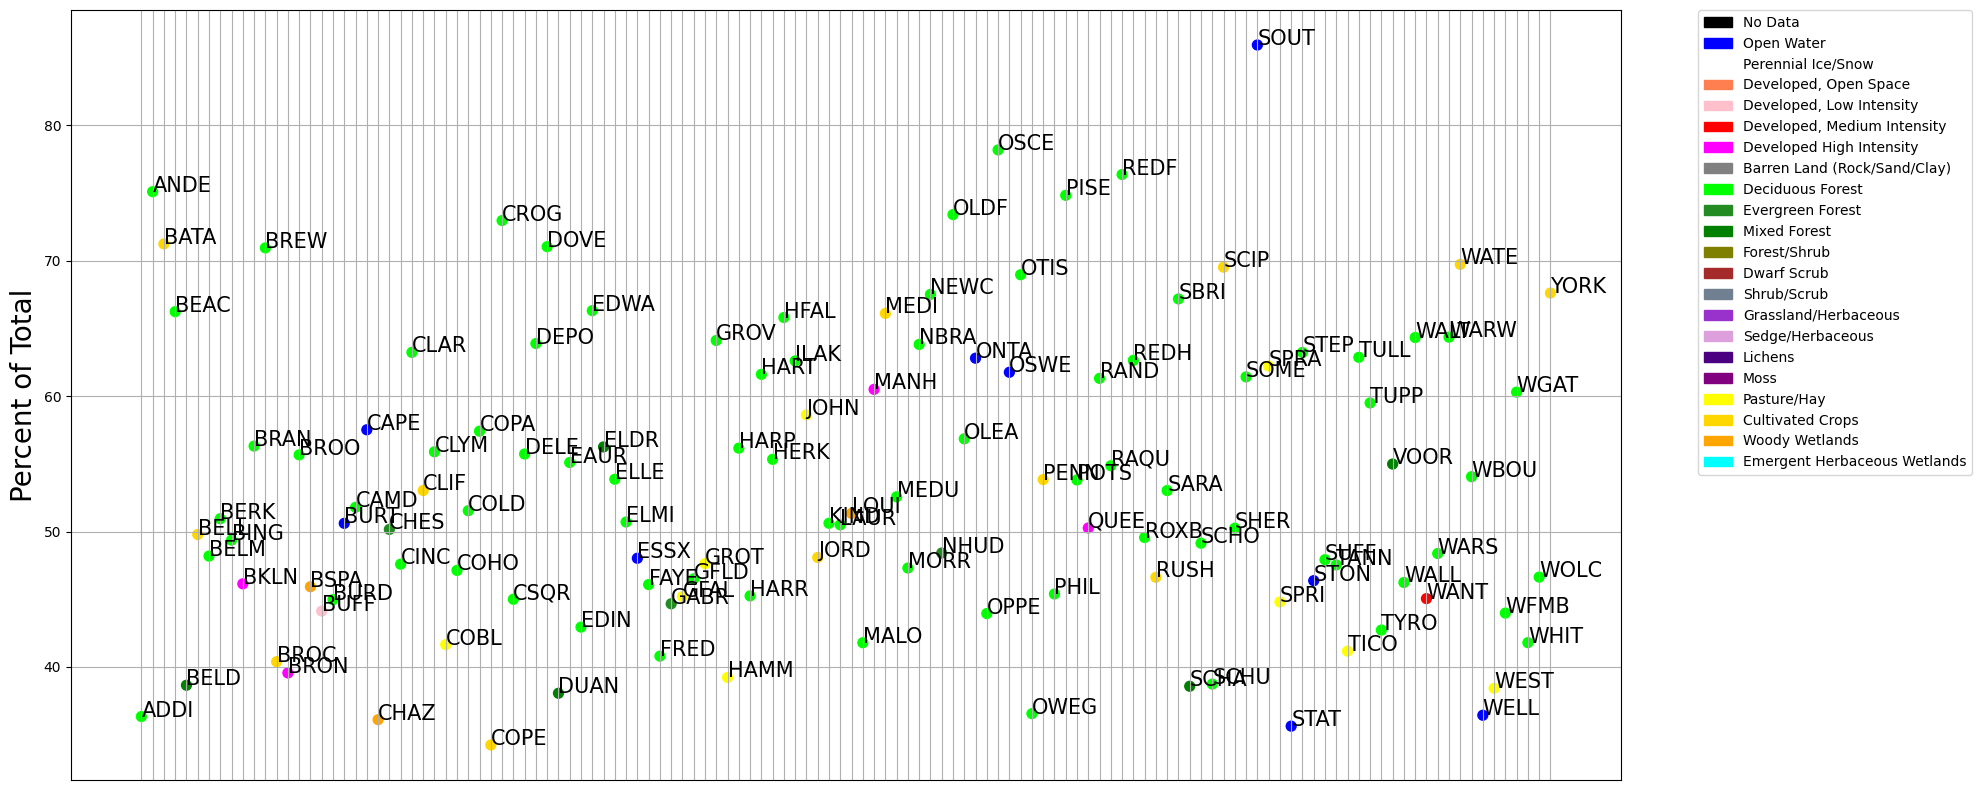

In [47]:
# make dots the color of the firsmode 
# make x axis by long

# could also plot by lon and lat and have scatter size linked to divide 
# marker type for above 50 or below 50%  

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(avg_lulc_ny_10_df['station'], avg_lulc_ny_10_df['divide'], c=avg_lulc_ny_10_df['color'], s=50)
for n in avg_lulc_ny_10_df.iterrows():
    ax.annotate(n[1]['station'], (n[1]['station'], n[1]['divide']), fontsize=15)
ax.grid()
ax.set_ylabel('Percent of Total', size=20)
ax.tick_params(labelbottom = False, bottom = False)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,handles=patches)

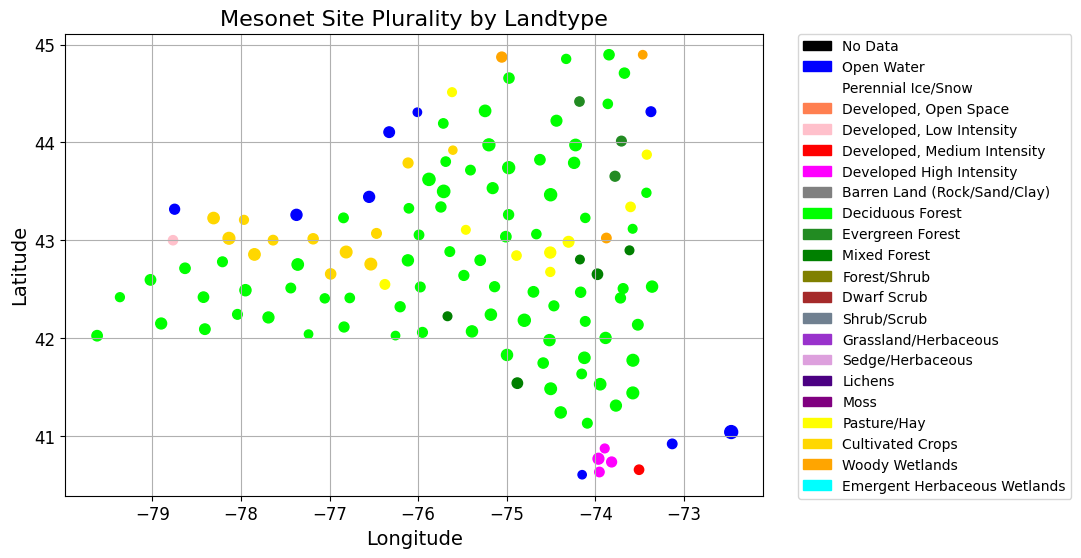

In [48]:
fig, ax = plt.subplots()
avg_lulc_ny_10_df.plot.scatter(x='lon',
                                        y='lat',
                                        c='color',
                                        s='divide',
                                        marker = 'o',
                                        figsize=(9,6),
                                        ax = ax
                                        )
ax.set_title('Mesonet Site Plurality by Landtype', size=16)
ax.set_xlabel('Longitude',size=14)
ax.set_ylabel('Latitude',size=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,handles=patches)

In [49]:
avg_lulc_ok_10_df_1=format_df(avg_lulc_ok_10_df)
avg_lulc_ok_10_df_1

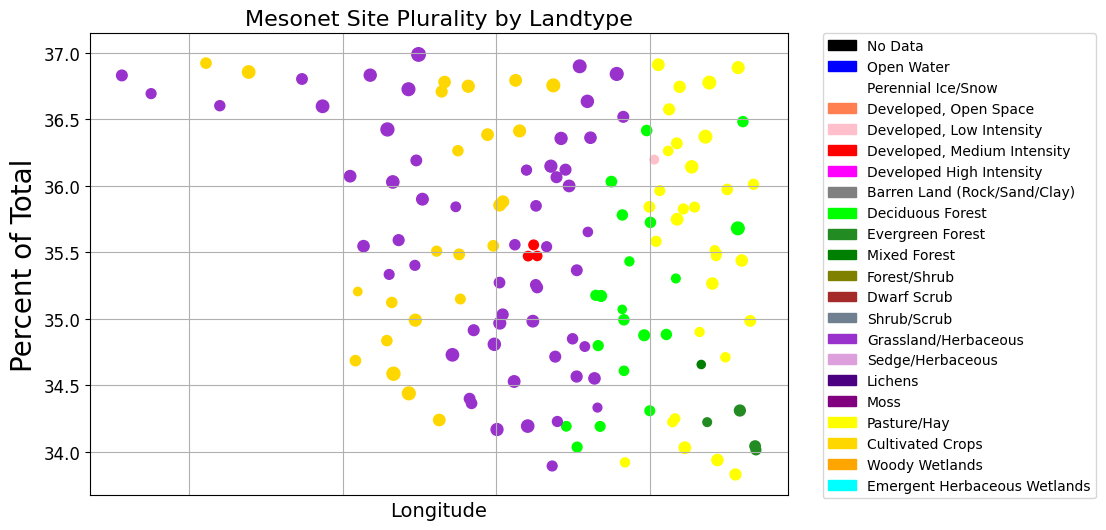

In [50]:
fig, ax = plt.subplots()
avg_lulc_ok_10_df.plot.scatter(x='lon',
                                        y='lat',
                                        c='color',
                                        s='divide',
                                        marker = 'o',
                                        figsize=(9,6),
                                        ax = ax
                                        )
ax.set_title('Mesonet Site Plurality by Landtype', size=16)
ax.set_xlabel('Longitude',size=14)
ax.set_ylabel('Latitude',size=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid()
ax.set_ylabel('Percent of Total', size=20)
ax.tick_params(labelbottom = False, bottom = False)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,handles=patches)

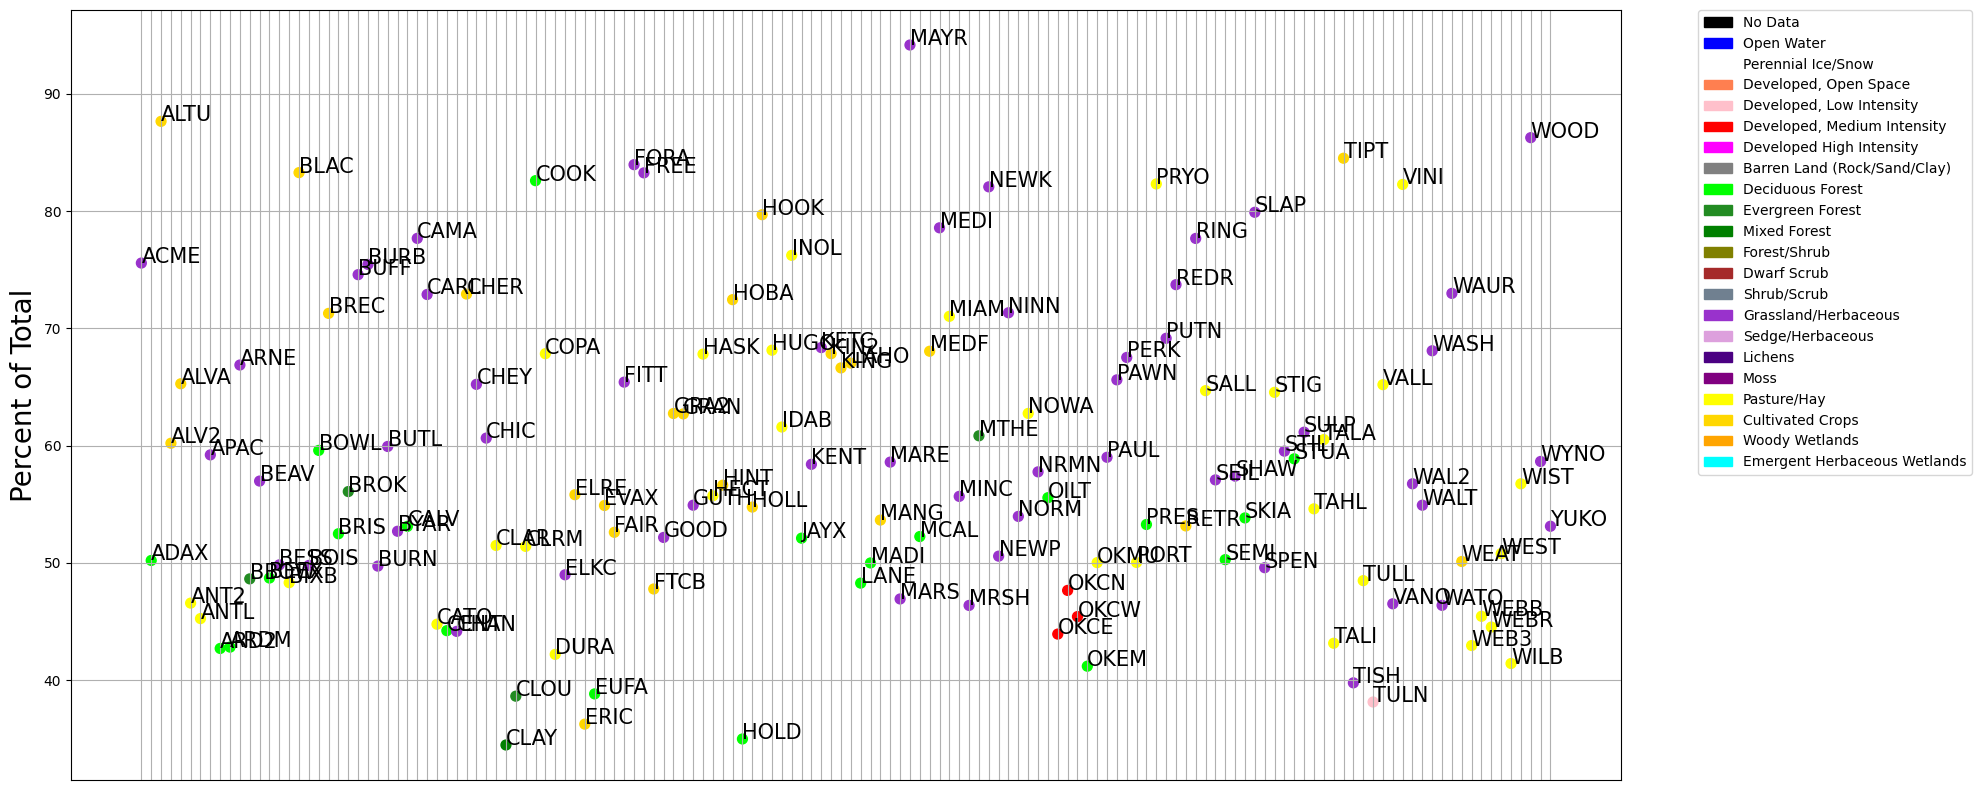

In [51]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(avg_lulc_ok_10_df['station'], avg_lulc_ok_10_df['divide'], c=avg_lulc_ok_10_df['color'], s=50)
for n in avg_lulc_ok_10_df.iterrows():
    ax.annotate(n[1]['station'], (n[1]['station'], n[1]['divide']), fontsize=15)
ax.grid()
ax.set_ylabel('Percent of Total', size=20)
ax.tick_params(labelbottom = False, bottom = False)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,handles=patches)

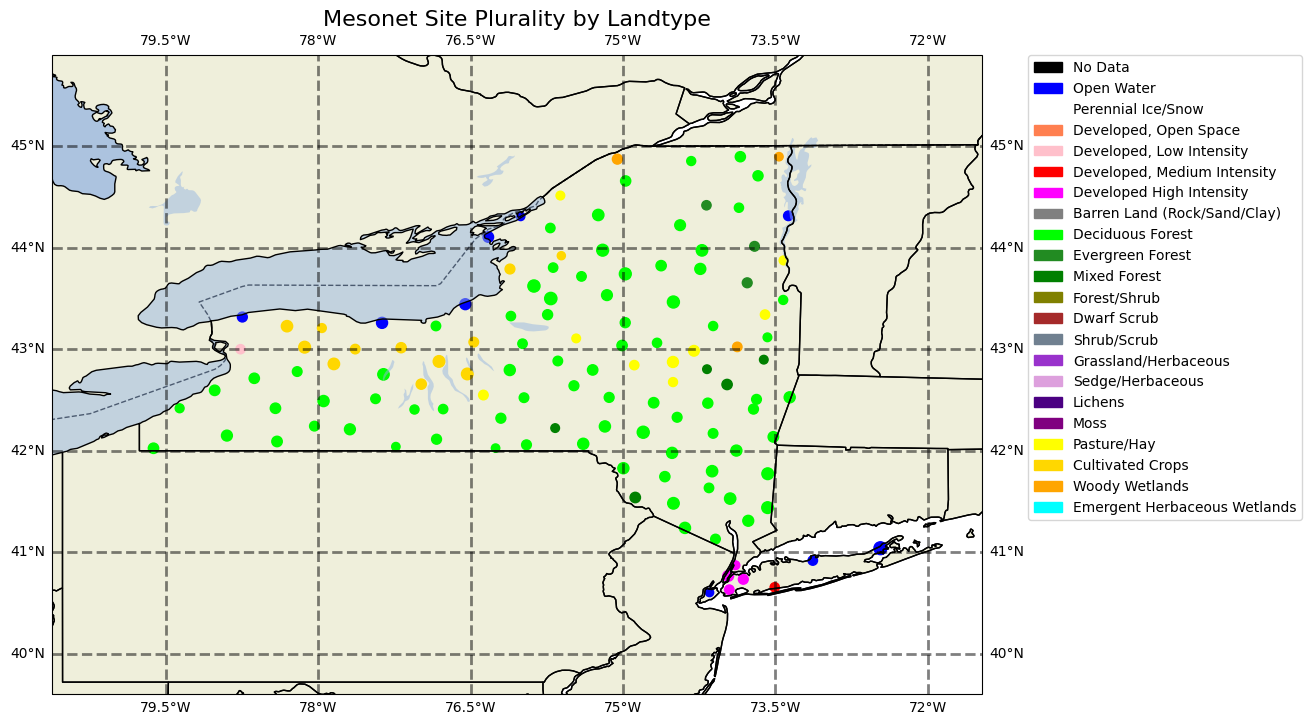

In [52]:
plurality_plot(avg_lulc_ny_10_df)

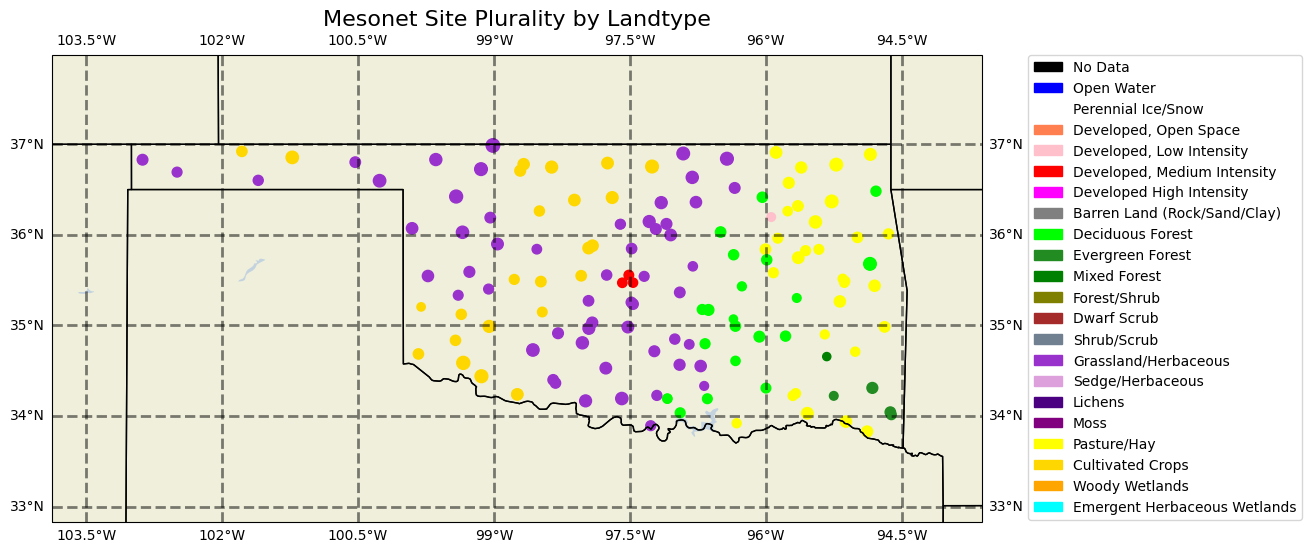

In [53]:
plurality_plot(avg_lulc_ok_10_df)

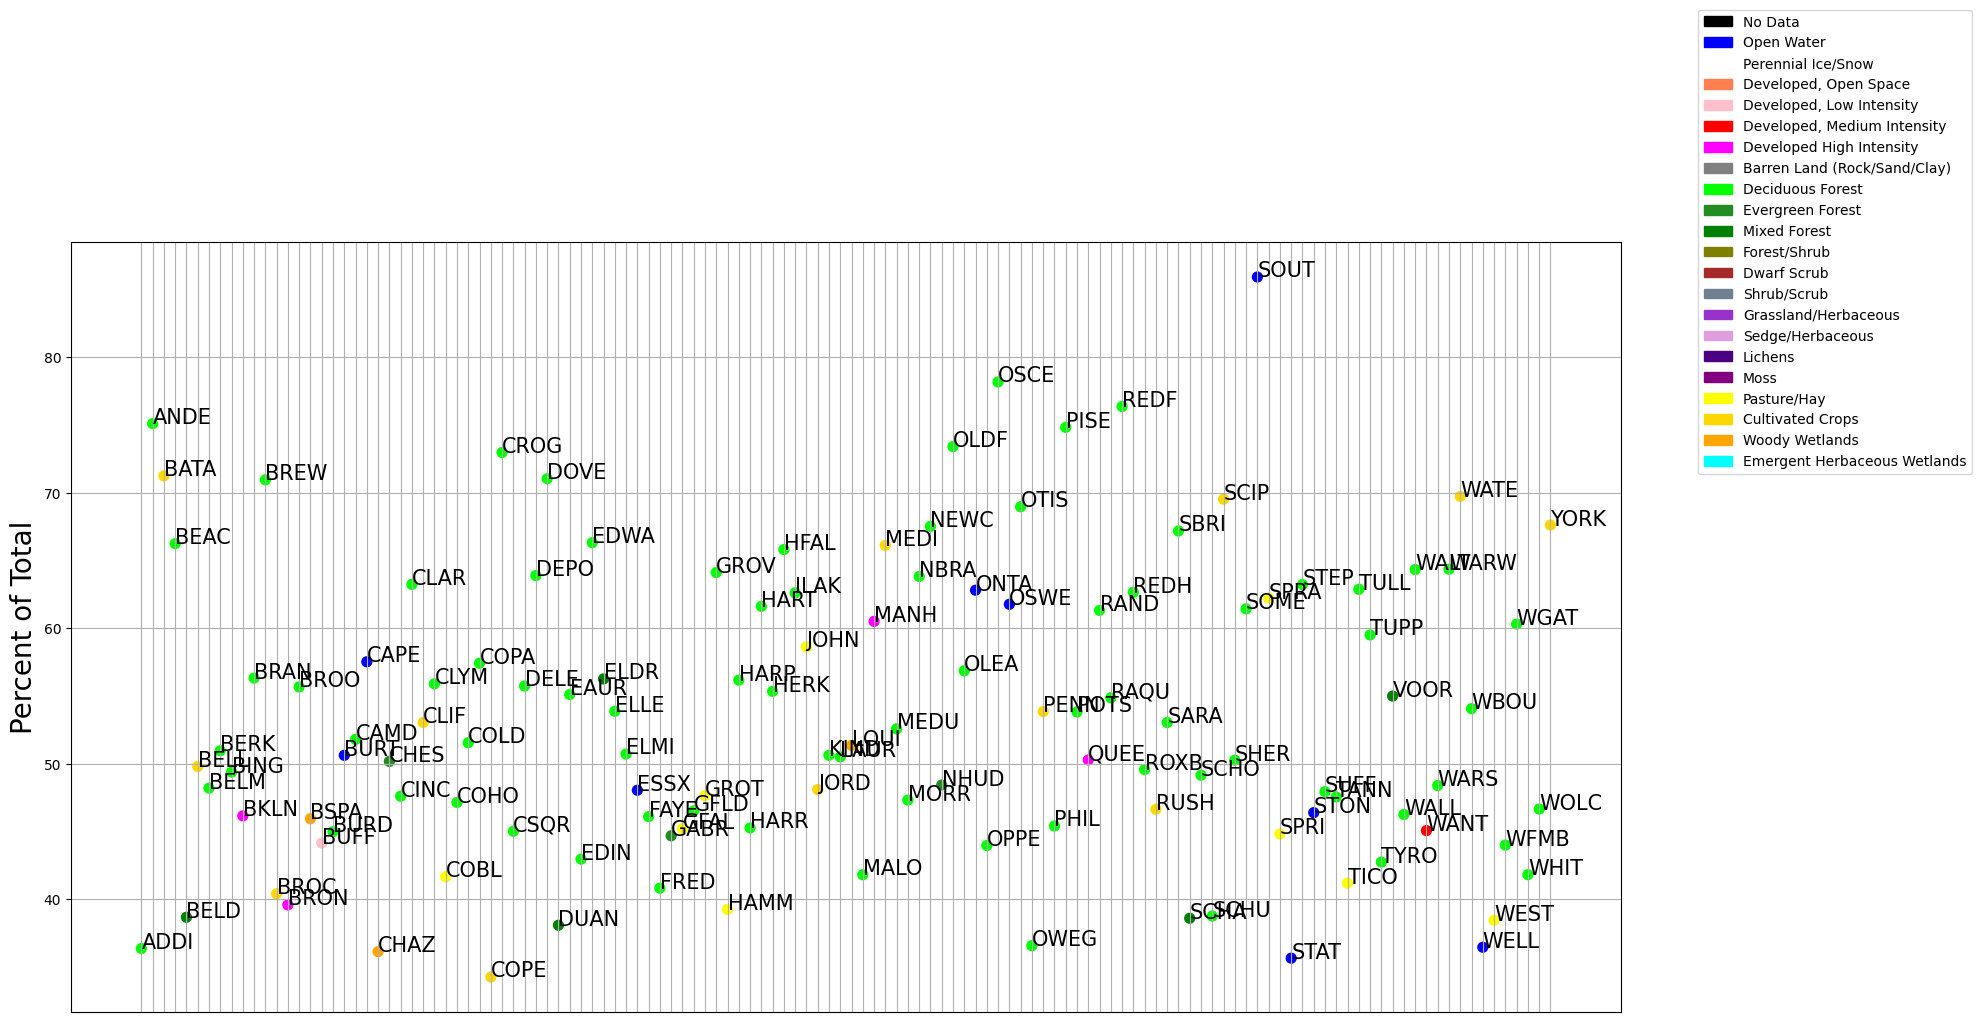

In [54]:
percent_plot(avg_lulc_ny_10_df)

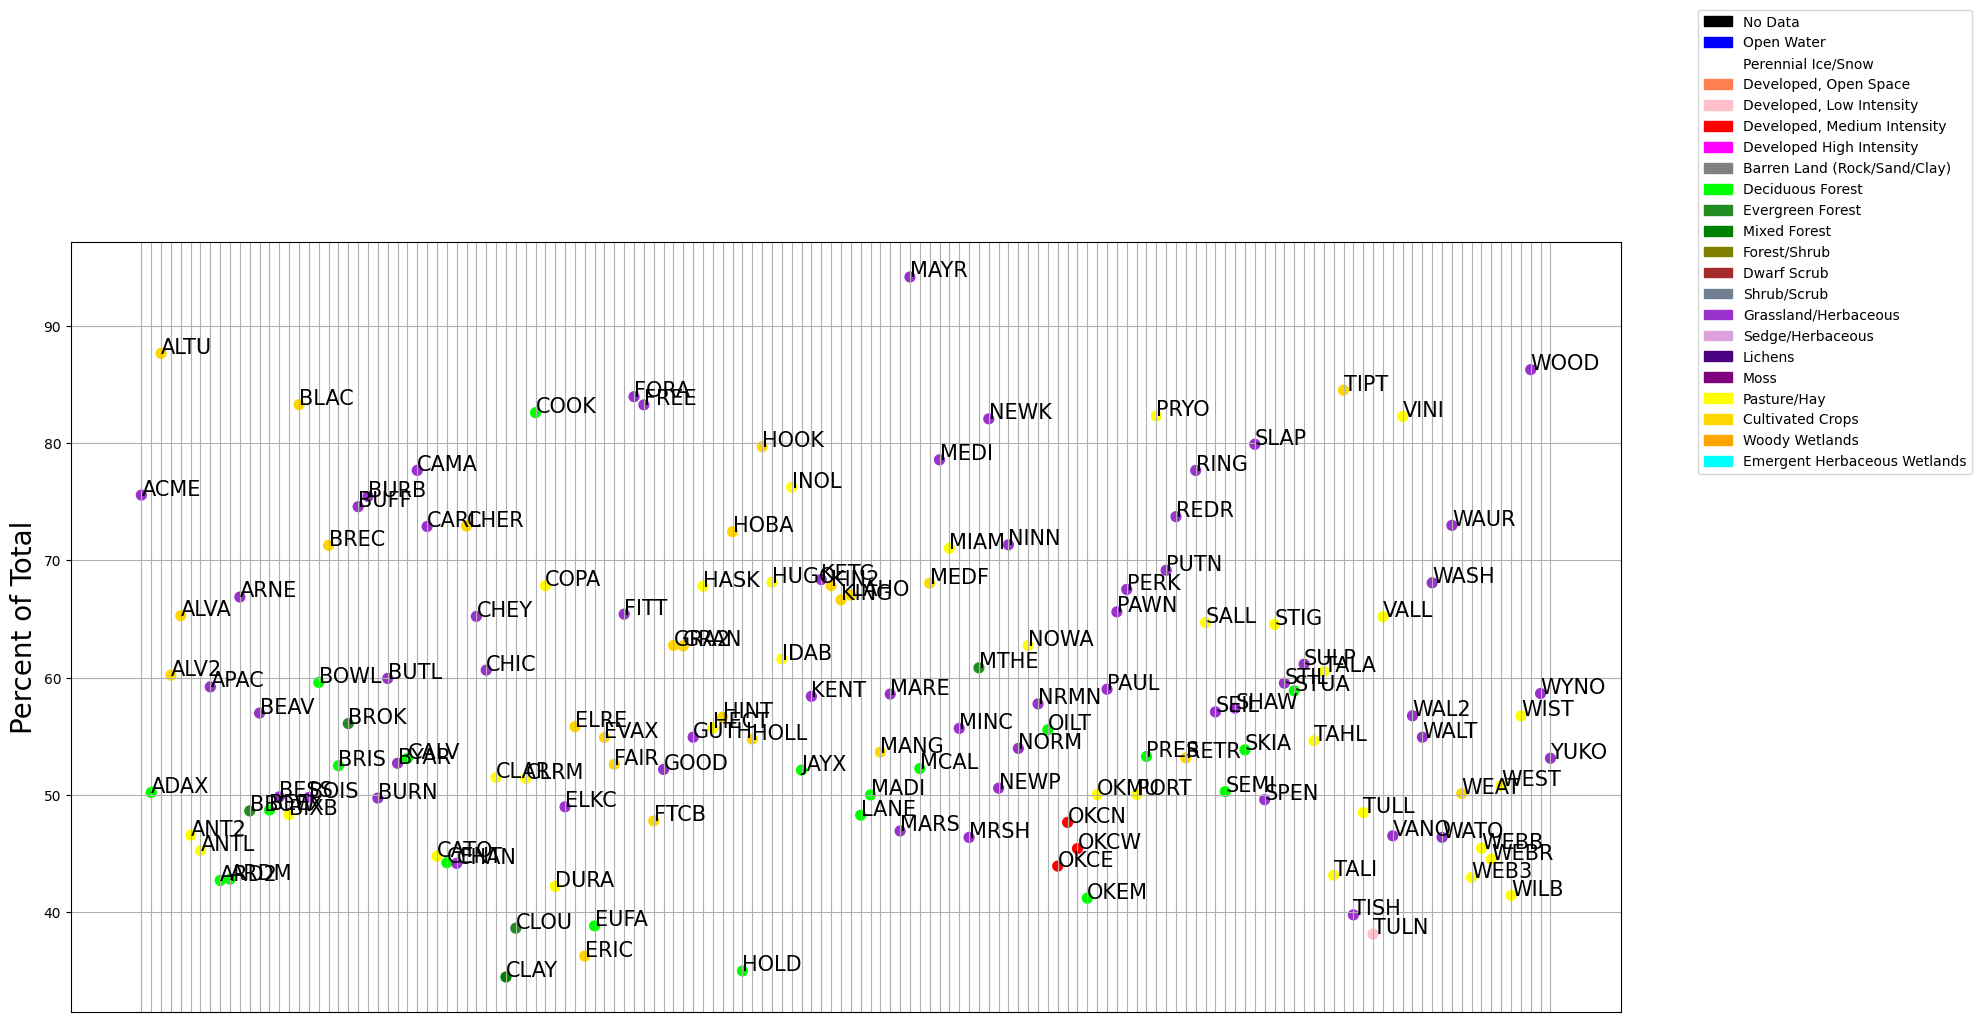

In [55]:
percent_plot(avg_lulc_ok_10_df)

In [56]:
#get plurality 
statlist = []
lon_list = []
lat_list = []
c_list = []
div_list = []

for x,_ in avg_lulc_ny_10_df.iterrows():
    if avg_lulc_ny_10_df['divide'].iloc[x] > 50:
        station = avg_lulc_ny_10_df['station'].iloc[x]
        lons = avg_lulc_ny_10_df['lon'].iloc[x]
        lats = avg_lulc_ny_10_df['lat'].iloc[x]
        color = avg_lulc_ny_10_df['color'].iloc[x]
        divide = avg_lulc_ny_10_df['divide'].iloc[x]
        statlist.append(station)
        lon_list.append(lons)
        lat_list.append(lats)
        c_list.append(color)
        div_list.append(divide)

In [57]:
plur_df = pd.DataFrame()
plur_df['station'] = statlist
plur_df['lon'] = lon_list
plur_df['lat'] = lat_list
plur_df['color'] = c_list
plur_df['divide'] = div_list

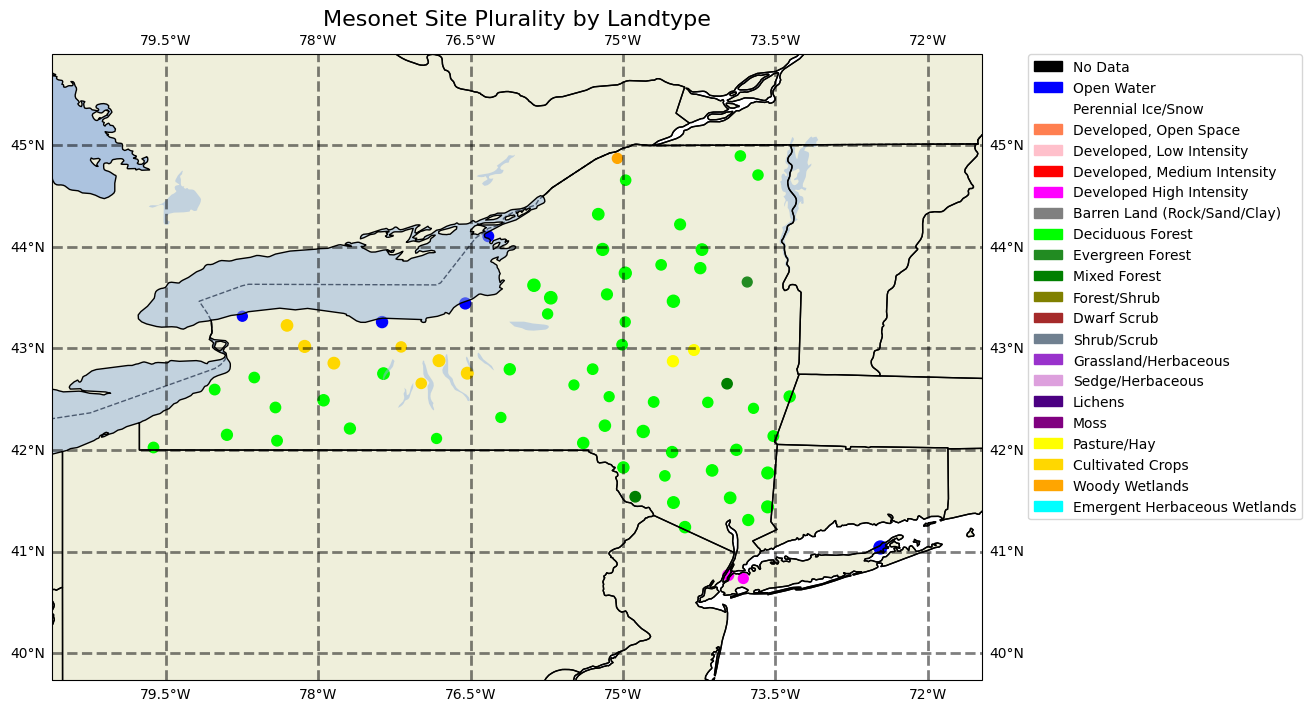

In [58]:
plurality_plot(plur_df)

In [59]:
#get plurality 
statlist_ok = []
lon_list_ok = []
lat_list_ok = []
c_list_ok = []
div_list_ok = []

for x,_ in avg_lulc_ok_10_df.iterrows():
    if avg_lulc_ok_10_df['divide'].iloc[x] > 50:
        station = avg_lulc_ok_10_df['station'].iloc[x]
        lons = avg_lulc_ok_10_df['lon'].iloc[x]
        lats = avg_lulc_ok_10_df['lat'].iloc[x]
        color = avg_lulc_ok_10_df['color'].iloc[x]
        divide = avg_lulc_ok_10_df['divide'].iloc[x]
        statlist_ok.append(station)
        lon_list_ok.append(lons)
        lat_list_ok.append(lats)
        c_list_ok.append(color)
        div_list_ok.append(divide)

In [60]:
plur_df_ok = pd.DataFrame()
plur_df_ok['station'] = statlist_ok
plur_df_ok['lon'] = lon_list_ok
plur_df_ok['lat'] = lat_list_ok
plur_df_ok['color'] = c_list_ok
plur_df_ok['divide'] = div_list_ok

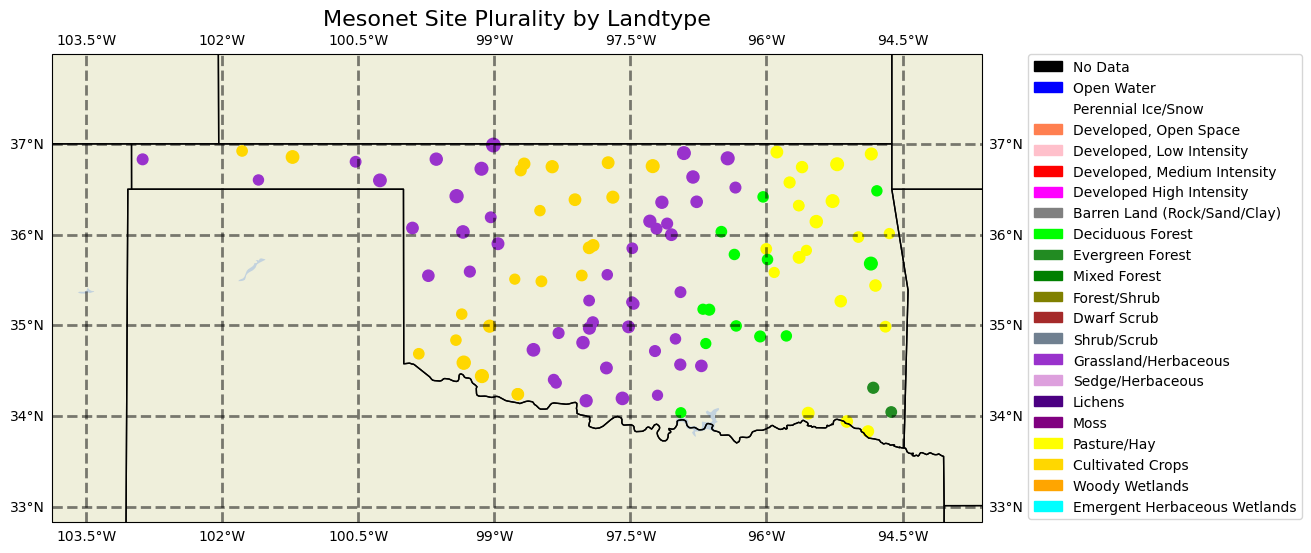

In [61]:
plurality_plot(plur_df_ok)